The Speed data and TMC data is imported then data for fifth avenue for eastbound and westbound is filtered out.

In [5]:
import pandas as pd
traf = pd.read_csv('Forbes-Project.csv')
TMC = pd.read_csv('TMC_Identification_REVISED.csv')

In [6]:
fifth = TMC.loc[TMC.road == '5TH AVE',:]
traf = traf.loc[traf.confidence_score >= 30 , :]

In [7]:
traf.rename(columns={'tmc_code':'tmc'}, inplace = True)

In [8]:
main = pd.merge(fifth,traf,on= 'tmc', how = 'inner')

In [9]:
EST = main.loc[main.direction == 'EASTBOUND',:]
WST = main.loc[main.direction == 'WESTBOUND',:]

In [10]:
EST['speed'].describe()

count    122680.000000
mean         18.861708
std           3.515728
min           4.000000
25%          16.740000
50%          18.920000
75%          21.000000
max          41.000000
Name: speed, dtype: float64

In [11]:
EST.rename(columns={'measurement_tstamp':'Date'}, inplace=True)
WST.rename(columns={'measurement_tstamp':'Date'}, inplace=True)

C:\python\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
import datetime as dt
EST['Date'] = pd.to_datetime(EST['Date'])
WST['Date'] = pd.to_datetime(WST['Date'])

C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The data is then grouped for every 1 hour and the average is calculated

In [13]:
EST = EST.groupby(pd.Grouper(key = 'Date',freq = '1H')).mean()
WST = WST.groupby(pd.Grouper(key = 'Date',freq = '1H')).mean()

In [14]:
EST = EST.reset_index()
WST = WST.reset_index()

In [15]:
import datetime
t1 = pd.to_datetime('3-7-2018')
t2 = pd.to_datetime('5-21-2018')
t3 = pd.to_datetime('8-14-2018')
t4 = pd.to_datetime('3-22-2019')
t5 = pd.to_datetime('04-06-2019')

The data for different period is then extracted and the average of all speed for particular time is then found and plotted

In [16]:
traf1= EST[EST["Date"].between(t1,t2)]
traf2 = EST[EST["Date"].between(t2,t3)]
traf3 = EST[EST['Date'].between(t3,t4)]
traf4 = EST[EST['Date'].between(t4,t5)]
traf5=  WST[WST["Date"].between(t1,t2)]
traf6 = WST[WST["Date"].between(t2,t3)]
traf7 = WST[WST['Date'].between(t3,t4)]
traf8 = WST[WST['Date'].between(t4,t5)]

In [17]:
import datetime as dt
traf1['mins'] = traf1['Date'].dt.time
traf2['mins'] = traf2['Date'].dt.time
traf3['mins'] = traf3['Date'].dt.time
traf4['mins'] = traf4['Date'].dt.time
traf5['mins'] = traf5['Date'].dt.time
traf6['mins'] = traf6['Date'].dt.time
traf7['mins'] = traf7['Date'].dt.time
traf8['mins'] = traf8['Date'].dt.time

C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [18]:
avg1 = traf1.groupby('mins').speed.mean()
avg2 = traf2.groupby('mins').speed.mean()
avg3 = traf3.groupby('mins').speed.mean()
avg4 = traf4.groupby('mins').speed.mean()
avg5 = traf5.groupby('mins').speed.mean()
avg6 = traf6.groupby('mins').speed.mean()
avg7 = traf7.groupby('mins').speed.mean()
avg8 = traf8.groupby('mins').speed.mean()

Text(0,0.5,'Speed')

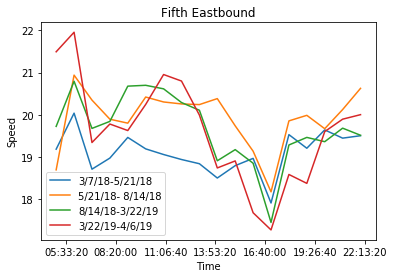

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(avg1, label = '3/7/18-5/21/18' )
plt.plot(avg2 , label = '5/21/18- 8/14/18')
plt.plot(avg3, label = '8/14/18-3/22/19')
plt.plot(avg4,label='3/22/19-4/6/19')
plt.title('Fifth Eastbound')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')

Text(0,0.5,'Speed')

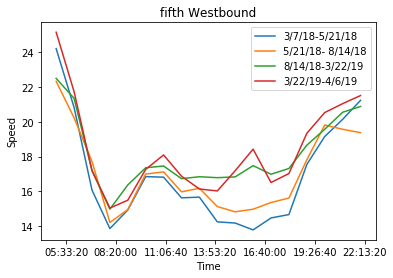

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(avg5, label = '3/7/18-5/21/18' )
plt.plot(avg6 , label = '5/21/18- 8/14/18')
plt.plot(avg7, label = '8/14/18-3/22/19')
plt.plot(avg8,label='3/22/19-4/6/19')
plt.title('fifth Westbound')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')